In [1]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=8,8

import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import cifar10

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import tensorflow as tf

https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(X, y), (_, _) = cifar10.load_data()

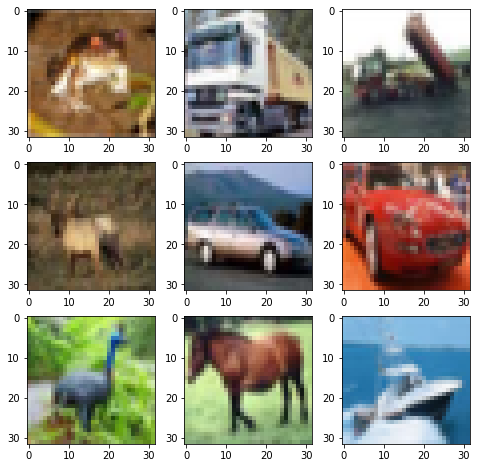

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i])

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train.shape

(33500, 32, 32, 3)

In [7]:
X_valid.shape

(16500, 32, 32, 3)

In [8]:
y_train.shape

(33500, 1)

In [9]:
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)

In [10]:
y_train.shape

(33500, 10)

In [11]:
y_valid.shape

(16500, 10)

In [12]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
X_train_norm = X_train.astype('float32') / 255
X_valid_norm = X_valid.astype('float32') / 255

In [14]:
model = Sequential()

model.add(Conv2D(30, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(100, activation="relu", name="1"))
model.add(Dense(100, activation="relu"))


model.add(Dense(100, activation="relu"))

model.add(Dense(10, activation="softmax", name="classification"))

In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
history = model.fit(X_train_norm, y_train,
          batch_size=64, epochs=15,
          verbose=2,
          validation_data=(X_valid_norm, y_valid))

Epoch 1/15
524/524 - 27s - loss: 1.6159 - accuracy: 0.4065 - val_loss: 1.3051 - val_accuracy: 0.5250
Epoch 2/15
524/524 - 30s - loss: 1.1992 - accuracy: 0.5704 - val_loss: 1.1463 - val_accuracy: 0.5924
Epoch 3/15
524/524 - 54s - loss: 1.0437 - accuracy: 0.6306 - val_loss: 1.0305 - val_accuracy: 0.6373
Epoch 4/15
524/524 - 42s - loss: 0.9494 - accuracy: 0.6641 - val_loss: 1.0644 - val_accuracy: 0.6176
Epoch 5/15
524/524 - 38s - loss: 0.8712 - accuracy: 0.6930 - val_loss: 0.9874 - val_accuracy: 0.6544
Epoch 6/15
524/524 - 40s - loss: 0.8043 - accuracy: 0.7168 - val_loss: 0.9864 - val_accuracy: 0.6529
Epoch 7/15
524/524 - 73s - loss: 0.7508 - accuracy: 0.7355 - val_loss: 0.9554 - val_accuracy: 0.6724
Epoch 8/15
524/524 - 64s - loss: 0.6932 - accuracy: 0.7552 - val_loss: 0.9395 - val_accuracy: 0.6767
Epoch 9/15
524/524 - 52s - loss: 0.6430 - accuracy: 0.7732 - val_loss: 1.0031 - val_accuracy: 0.6645
Epoch 10/15
524/524 - 50s - loss: 0.5975 - accuracy: 0.7885 - val_loss: 0.9846 - val_accura

In [17]:
model.save('competition_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: competition_model/assets


In [18]:
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [19]:
y_pred = model.predict(X_valid_norm)

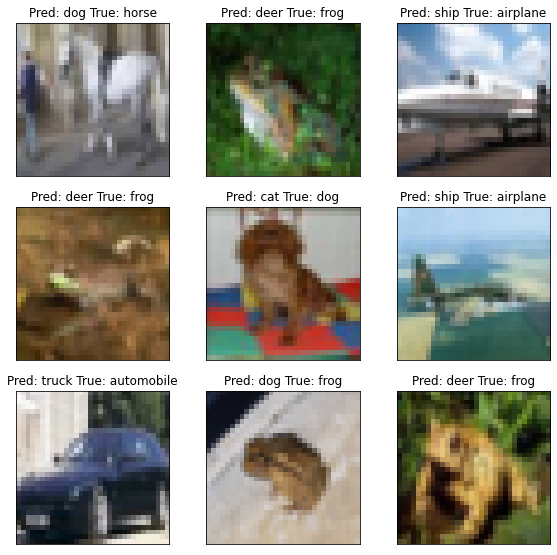

In [23]:
fig = plt.figure()
j = 0
i = 0
while i < 9:
    if np.argmax(y_pred[i + j]) != np.argmax(y_valid[i + j]):
        plt.subplot(3,3,i+1)
        plt.tight_layout()
        plt.imshow(X_valid[i + j], cmap='hot', interpolation='none')
        plt.title("Pred: {} True: {}".format(labels[np.argmax(y_pred[i + j])], labels[np.argmax(y_valid[i + j])]))
        plt.xticks([])
        plt.yticks([])
        i += 1
    else :
        j += 1
            

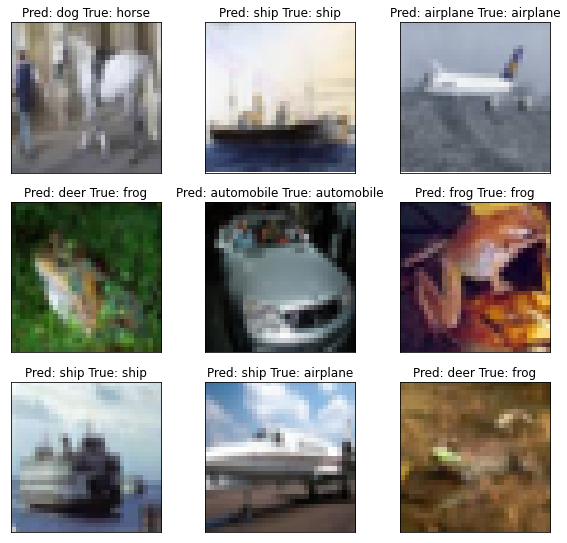

In [24]:
fig = plt.figure()
j = 0
i = 0
while i < 9:
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_valid[i + j], cmap='hot', interpolation='none')
    plt.title("Pred: {} True: {}".format(labels[np.argmax(y_pred[i + j])], labels[np.argmax(y_valid[i + j])]))
    plt.xticks([])
    plt.yticks([])
    i += 1
            